In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
from os.path import isdir, join
import librosa
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,SeparableConv2D,BatchNormalization,AveragePooling2D
# Any results you write to the current directory are saved as output.

['train', 'sample_submission.csv']


Using TensorFlow backend.


In [2]:
audio_path = "../input/train/audio"
print(os.listdir(audio_path))

['happy', 'nine', 'two', 'stop', 'wow', 'down', 'on', 'off', 'zero', 'seven', 'bird', 'house', 'go', 'eight', 'six', 'tree', 'one', 'up', 'cat', 'yes', 'sheila', 'no', 'right', 'four', 'left', 'five', 'bed', 'three', 'dog', '_background_noise_', 'marvin']


In [3]:
# all audio dirs
dirs = [f for f in os.listdir(audio_path) if os.path.isdir(join(audio_path, f))]
dirs.sort()

In [4]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 4))
# librosa.display.specshow(mfcc, x_axis='time')
# plt.colorbar()
# plt.title('MFCC')
# plt.tight_layout()

In [5]:
import librosa.display

In [6]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 4))
# librosa.display.specshow(mfcc, x_axis='time')
# plt.colorbar()
# plt.title('MFCC')
# plt.tight_layout()

In [7]:
import os
import librosa
import numpy as np
class AudioFeatureDataset():
    def __init__(self,file_path):
        self.file_path = file_path
        self.labels = os.listdir(self.file_path)
        self.target_labels = ['no', 'seven', 'right', 'up', 'down', 'eight', 'six', 'wow', 'bird', 'tree', 'happy', 'three', 'five', 'zero', 'go', 'left', 'nine', 'two', 'four', 'yes', 'bed', 'stop', 'cat', 'dog', 'marvin', 'off', 'one', 'on', 'sheila', 'house']
        self.data_dict = {}
        for tl in self.target_labels:
            files_dir = os.path.join(file_path,tl)
            all_audio_fp_s =[ os.path.join(files_dir,f) for f in os.listdir(files_dir)]
            self.data_dict[tl] = all_audio_fp_s
    
    def process(self,file,max_pad = 35):
        samps,sr = librosa.load(file, mono=True, sr=None)
        mfcc = librosa.feature.mfcc(samps, sr = sr)
        pad_width = max_pad - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        return mfcc
    def get_dataset(self):
        labels =  []
        features = []
        for t in self.target_labels:
            for fp in self.data_dict[t]:
                labels.append(t)
                features.append(self.process(fp))
        return labels, features

In [8]:
a = AudioFeatureDataset(audio_path)

In [9]:
Y,x = a.get_dataset()

In [10]:
x = np.array(x)
Y = np.array(Y)

In [11]:
from sklearn.model_selection import train_test_split

def get_train_test(split_ratio=0.6, random_state=42):
    return train_test_split(librosa.util.normalize(x), Y, test_size= (1 - split_ratio), random_state=random_state, shuffle=True)

In [12]:
X_train, X_test, y_train, y_test = get_train_test()

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size= 0.1, random_state=42, shuffle=True)

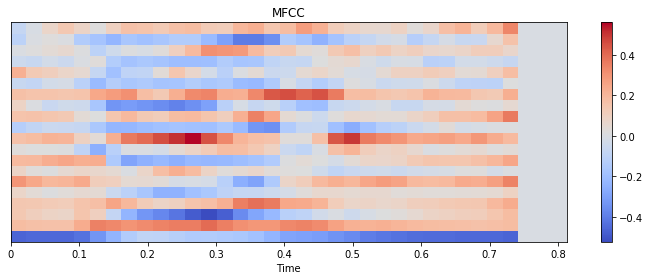

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(X_train[3], x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [15]:
from keras.utils.np_utils import to_categorical

In [16]:

X_train = X_train.reshape(X_train.shape[0], 20, 35, 1)
X_valid =  X_valid.reshape(X_valid.shape[0], 20, 35, 1)

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [18]:
labelencoder.fit_transform(y_test)

array([ 3, 14, 25, ..., 25, 21,  6])

In [19]:
mapping = dict(zip(labelencoder.classes_, range(len(labelencoder.classes_))))

In [20]:
mapping

{'bed': 0,
 'bird': 1,
 'cat': 2,
 'dog': 3,
 'down': 4,
 'eight': 5,
 'five': 6,
 'four': 7,
 'go': 8,
 'happy': 9,
 'house': 10,
 'left': 11,
 'marvin': 12,
 'nine': 13,
 'no': 14,
 'off': 15,
 'on': 16,
 'one': 17,
 'right': 18,
 'seven': 19,
 'sheila': 20,
 'six': 21,
 'stop': 22,
 'three': 23,
 'tree': 24,
 'two': 25,
 'up': 26,
 'wow': 27,
 'yes': 28,
 'zero': 29}

In [21]:
y_test = labelencoder.fit_transform(y_test)
mapping = dict(zip(labelencoder.classes_, range(len(labelencoder.classes_))))

In [22]:
y_valid = labelencoder.fit_transform(y_valid)

In [23]:
y_test

array([ 3, 14, 25, ..., 25, 21,  6])

In [24]:
y_train = labelencoder.fit_transform(y_train)
mapping = dict(zip(labelencoder.classes_, range(len(labelencoder.classes_))))

In [25]:
mapping

{'bed': 0,
 'bird': 1,
 'cat': 2,
 'dog': 3,
 'down': 4,
 'eight': 5,
 'five': 6,
 'four': 7,
 'go': 8,
 'happy': 9,
 'house': 10,
 'left': 11,
 'marvin': 12,
 'nine': 13,
 'no': 14,
 'off': 15,
 'on': 16,
 'one': 17,
 'right': 18,
 'seven': 19,
 'sheila': 20,
 'six': 21,
 'stop': 22,
 'three': 23,
 'tree': 24,
 'two': 25,
 'up': 26,
 'wow': 27,
 'yes': 28,
 'zero': 29}

In [26]:
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [27]:
X_test.shape

(25889, 20, 35)

In [28]:

X_test = X_test.reshape(X_test.shape[0], 20, 35, 1)

In [29]:
X_test.shape

(25889, 20, 35, 1)

In [30]:
from keras.optimizers import Optimizer
from keras import backend as K
import six
import copy
from six.moves import zip
from keras.utils.generic_utils import serialize_keras_object
from keras.utils.generic_utils import deserialize_keras_object
from keras.legacy import interfaces
class AdamW(Optimizer):
    """Adam optimizer.
    Default parameters follow those provided in the original paper.
    # Arguments
        lr: float >= 0. Learning rate.
        beta_1: float, 0 < beta < 1. Generally close to 1.
        beta_2: float, 0 < beta < 1. Generally close to 1.
        epsilon: float >= 0. Fuzz factor.
        decay: float >= 0. Learning rate decay over each update.
        weight_decay: float >= 0. Decoupled weight decay over each update.
    # References
        - [Adam - A Method for Stochastic Optimization](http://arxiv.org/abs/1412.6980v8)
        - [Optimization for Deep Learning Highlights in 2017](http://ruder.io/deep-learning-optimization-2017/index.html)
        - [Fixing Weight Decay Regularization in Adam](https://arxiv.org/abs/1711.05101)
    """

    def __init__(self, lr=0.001, beta_1=0.9, beta_2=0.999, weight_decay=1e-4,  # decoupled weight decay (1/6)
                 epsilon=1e-8, decay=0., **kwargs):
        super(AdamW, self).__init__(**kwargs)
        with K.name_scope(self.__class__.__name__):
            self.iterations = K.variable(0, dtype='int64', name='iterations')
            self.lr = K.variable(lr, name='lr')
            self.init_lr = lr # decoupled weight decay (2/6)
            self.beta_1 = K.variable(beta_1, name='beta_1')
            self.beta_2 = K.variable(beta_2, name='beta_2')
            self.decay = K.variable(decay, name='decay')
            self.wd = K.variable(weight_decay, name='weight_decay') # decoupled weight decay (3/6)
        self.epsilon = epsilon
        self.initial_decay = decay

    @interfaces.legacy_get_updates_support
    def get_updates(self, loss, params):
        grads = self.get_gradients(loss, params)
        self.updates = [K.update_add(self.iterations, 1)]
        wd = self.wd # decoupled weight decay (4/6)

        lr = self.lr
        if self.initial_decay > 0:
            lr *= (1. / (1. + self.decay * K.cast(self.iterations,
                                                  K.dtype(self.decay))))
        eta_t = lr / self.init_lr # decoupled weight decay (5/6)

        t = K.cast(self.iterations, K.floatx()) + 1
        lr_t = lr * (K.sqrt(1. - K.pow(self.beta_2, t)) /
                     (1. - K.pow(self.beta_1, t)))

        ms = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
        vs = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
        self.weights = [self.iterations] + ms + vs

        for p, g, m, v in zip(params, grads, ms, vs):
            m_t = (self.beta_1 * m) + (1. - self.beta_1) * g
            v_t = (self.beta_2 * v) + (1. - self.beta_2) * K.square(g)
            p_t = p - lr_t * m_t / (K.sqrt(v_t) + self.epsilon) - eta_t * wd * p # decoupled weight decay (6/6)

            self.updates.append(K.update(m, m_t))
            self.updates.append(K.update(v, v_t))
            new_p = p_t

            # Apply constraints.
            if getattr(p, 'constraint', None) is not None:
                new_p = p.constraint(new_p)

            self.updates.append(K.update(p, new_p))
        return self.updates

    def get_config(self):
        config = {'lr': float(K.get_value(self.lr)),
                  'beta_1': float(K.get_value(self.beta_1)),
                  'beta_2': float(K.get_value(self.beta_2)),
                  'decay': float(K.get_value(self.decay)),
                  'weight_decay': float(K.get_value(self.wd)),
                  'epsilon': self.epsilon}
        base_config = super(AdamW, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [31]:
# Depth Wise CNN (DS-CNN)
model = Sequential()
model.add(Conv2D(64, kernel_size=(20, 8), activation='relu', input_shape=(20, 35, 1)))
model.add(MaxPooling2D(pool_size=(2, 2),dim_ordering="th"))
model.add(Dropout(0.25))
## Depth Seprable Pooling Layer - start
model.add(SeparableConv2D(64, kernel_size=(10, 4), activation='relu',dim_ordering="th"))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(1, 1), activation='relu',dim_ordering="th"))
model.add(BatchNormalization())
model.add(SeparableConv2D(64, kernel_size=(10, 4), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(1, 1), activation='relu'))
model.add(BatchNormalization())
## Depth Seprable pooling Layer - end
model.add(AveragePooling2D(pool_size=(2, 2),dim_ordering="th"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(30, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),metrics=['accuracy'])
model.summary()


Instructions for updating:
Colocations handled automatically by placer.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, kernel_size=(10, 4), activation="relu", data_format="channels_first")`
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(1, 1), activation="relu", data_format="channels_first")`
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `AveragePooling2D` call to the Keras 2 API: `AveragePooling2D(pool_size=(2, 2), data_format="channels_first")`
  app.launch_new_instance()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 28, 64)         10304     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 14, 32)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 14, 32)         0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 64, 5, 29)         168       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 5, 29)         116       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 5, 29)         4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 5, 29)         116       
__________

In [32]:
model.fit(X_train, y_train, batch_size=100, epochs=150, verbose=1, validation_data=(X_valid, y_valid))

Instructions for updating:
Use tf.cast instead.
Train on 34948 samples, validate on 3884 samples
Epoch 1/150
34948/34948 [==============================] - 8s 236us/step - loss: 2.0452 - acc: 0.4079 - val_loss: 0.9244 - val_acc: 0.7276
Epoch 2/150
34948/34948 [==============================] - 4s 105us/step - loss: 0.9385 - acc: 0.7146 - val_loss: 0.6632 - val_acc: 0.8036
Epoch 3/150
34948/34948 [==============================] - 4s 105us/step - loss: 0.7489 - acc: 0.7726 - val_loss: 0.5563 - val_acc: 0.8326
Epoch 4/150
34948/34948 [==============================] - 4s 105us/step - loss: 0.6619 - acc: 0.7986 - val_loss: 0.5126 - val_acc: 0.8481
Epoch 5/150
34948/34948 [==============================] - 4s 105us/step - loss: 0.6038 - acc: 0.8154 - val_loss: 0.4703 - val_acc: 0.8628
Epoch 6/150
34948/34948 [==============================] - 4s 104us/step - loss: 0.5673 - acc: 0.8271 - val_loss: 0.4654 - val_acc: 0.8581
Epoch 7/150
34948/34948 [==============================] - 4s 104us/s

In [33]:
%%time
count = 0
for i in range(1000):    
    tesval = np.array([X_test[i]]).reshape(1,20,35,1)
    if np.argmax(model.predict(tesval)) ==  np.argmax(y_test[i]):
        count+= 1
print(count)

911
CPU times: user 1.89 s, sys: 212 ms, total: 2.1 s
Wall time: 1.54 s


In [34]:
tesval.shape

(1, 20, 35, 1)

In [35]:
np.argmax(model.predict(tesval))

16

In [36]:
tesval.shape

(1, 20, 35, 1)

In [37]:
model.save_weights('result-dscnn.h5')